In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

In [69]:
df = pd.read_csv("house.csv")
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [70]:
df.shape

(505, 1)

In [71]:
def split_row(row):
    return row.str.split(expand=True)

df_new = df.iloc[:, 0].str.split(expand=True)

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_new.columns = column_names

df_new = df_new.apply(pd.to_numeric)

print(f"Taille du DataFrame: {df_new.shape}")

print("\nNoms des colonnes:")
print(df_new.columns)

Taille du DataFrame: (505, 14)

Noms des colonnes:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [72]:
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [73]:
df_new.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [74]:
# Pour référence, voici les noms des colonnes du dataset Boston Housing
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Vous pouvez créer un dictionnaire avec les descriptions pour référence future
descriptions = {
    'CRIM': 'Taux de criminalité par habitant par ville',
    'ZN': 'Proportion de zones résidentielles zonées pour des lots de plus de 25 000 pieds carrés',
    'INDUS': 'Proportion d\'acres commerciales non-retail par ville',
    'CHAS': 'Variable binaire Charles River (1 si le tract est adjacent à la rivière, 0 sinon)',
    'NOX': 'Concentration d\'oxydes d\'azote (parties par 10 millions)',
    'RM': 'Nombre moyen de pièces par logement',
    'AGE': 'Proportion de logements occupés par leur propriétaire construits avant 1940',
    'DIS': 'Distances pondérées aux cinq centres d\'emploi de Boston',
    'RAD': 'Indice d\'accessibilité aux autoroutes radiales',
    'TAX': 'Taux d\'imposition foncière pour 10 000$',
    'PTRATIO': 'Ratio élèves-enseignants par ville',
    'B': 'Calculé comme 1000(Bk - 0.63)² où Bk est la proportion de personnes noires',
    'LSTAT': 'Pourcentage de population de statut inférieur',
    'MEDV': 'Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars'
}

for col, desc in descriptions.items():
    print(f"{col}: {desc}")

CRIM: Taux de criminalité par habitant par ville
ZN: Proportion de zones résidentielles zonées pour des lots de plus de 25 000 pieds carrés
INDUS: Proportion d'acres commerciales non-retail par ville
CHAS: Variable binaire Charles River (1 si le tract est adjacent à la rivière, 0 sinon)
NOX: Concentration d'oxydes d'azote (parties par 10 millions)
RM: Nombre moyen de pièces par logement
AGE: Proportion de logements occupés par leur propriétaire construits avant 1940
DIS: Distances pondérées aux cinq centres d'emploi de Boston
RAD: Indice d'accessibilité aux autoroutes radiales
TAX: Taux d'imposition foncière pour 10 000$
PTRATIO: Ratio élèves-enseignants par ville
B: Calculé comme 1000(Bk - 0.63)² où Bk est la proportion de personnes noires
LSTAT: Pourcentage de population de statut inférieur
MEDV: Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars


In [75]:
df_new.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Il n'existe aucune valeur manquante dans l'ensemble de données.

In [76]:
df_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1. Boxplots pour identifier les outliers

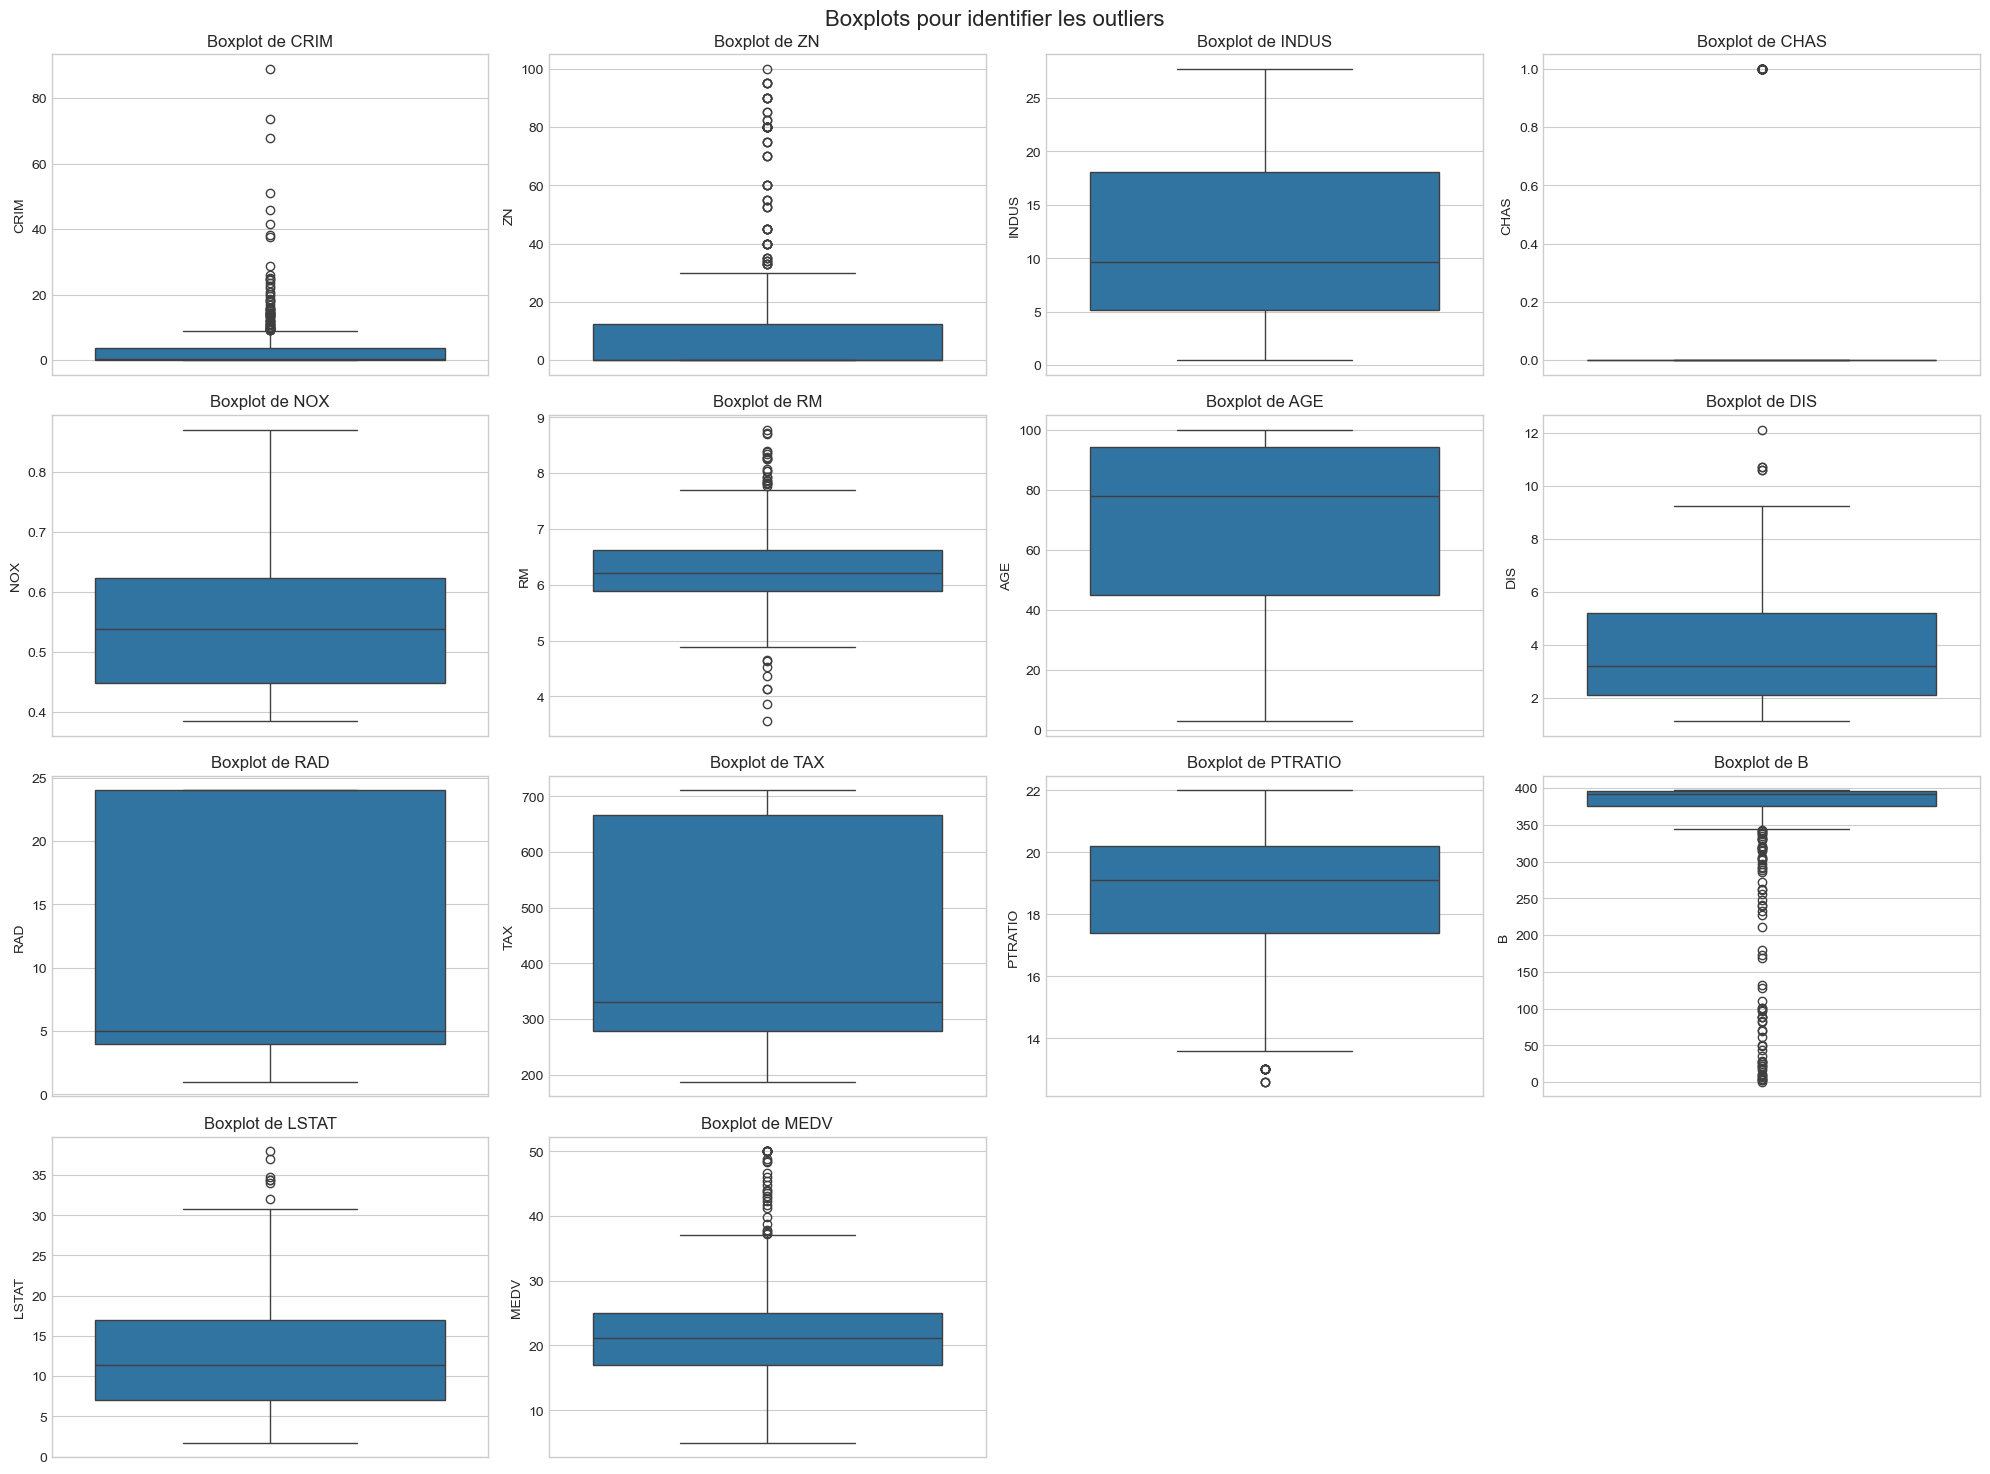

In [77]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (20, 15)

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df_new.columns):
    if i < len(axes):
        sns.boxplot(y=df_new[col], ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_ylabel(col)

for i in range(len(df_new.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Boxplots pour identifier les outliers', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

### 2. Distribution des variables avec histogrammes

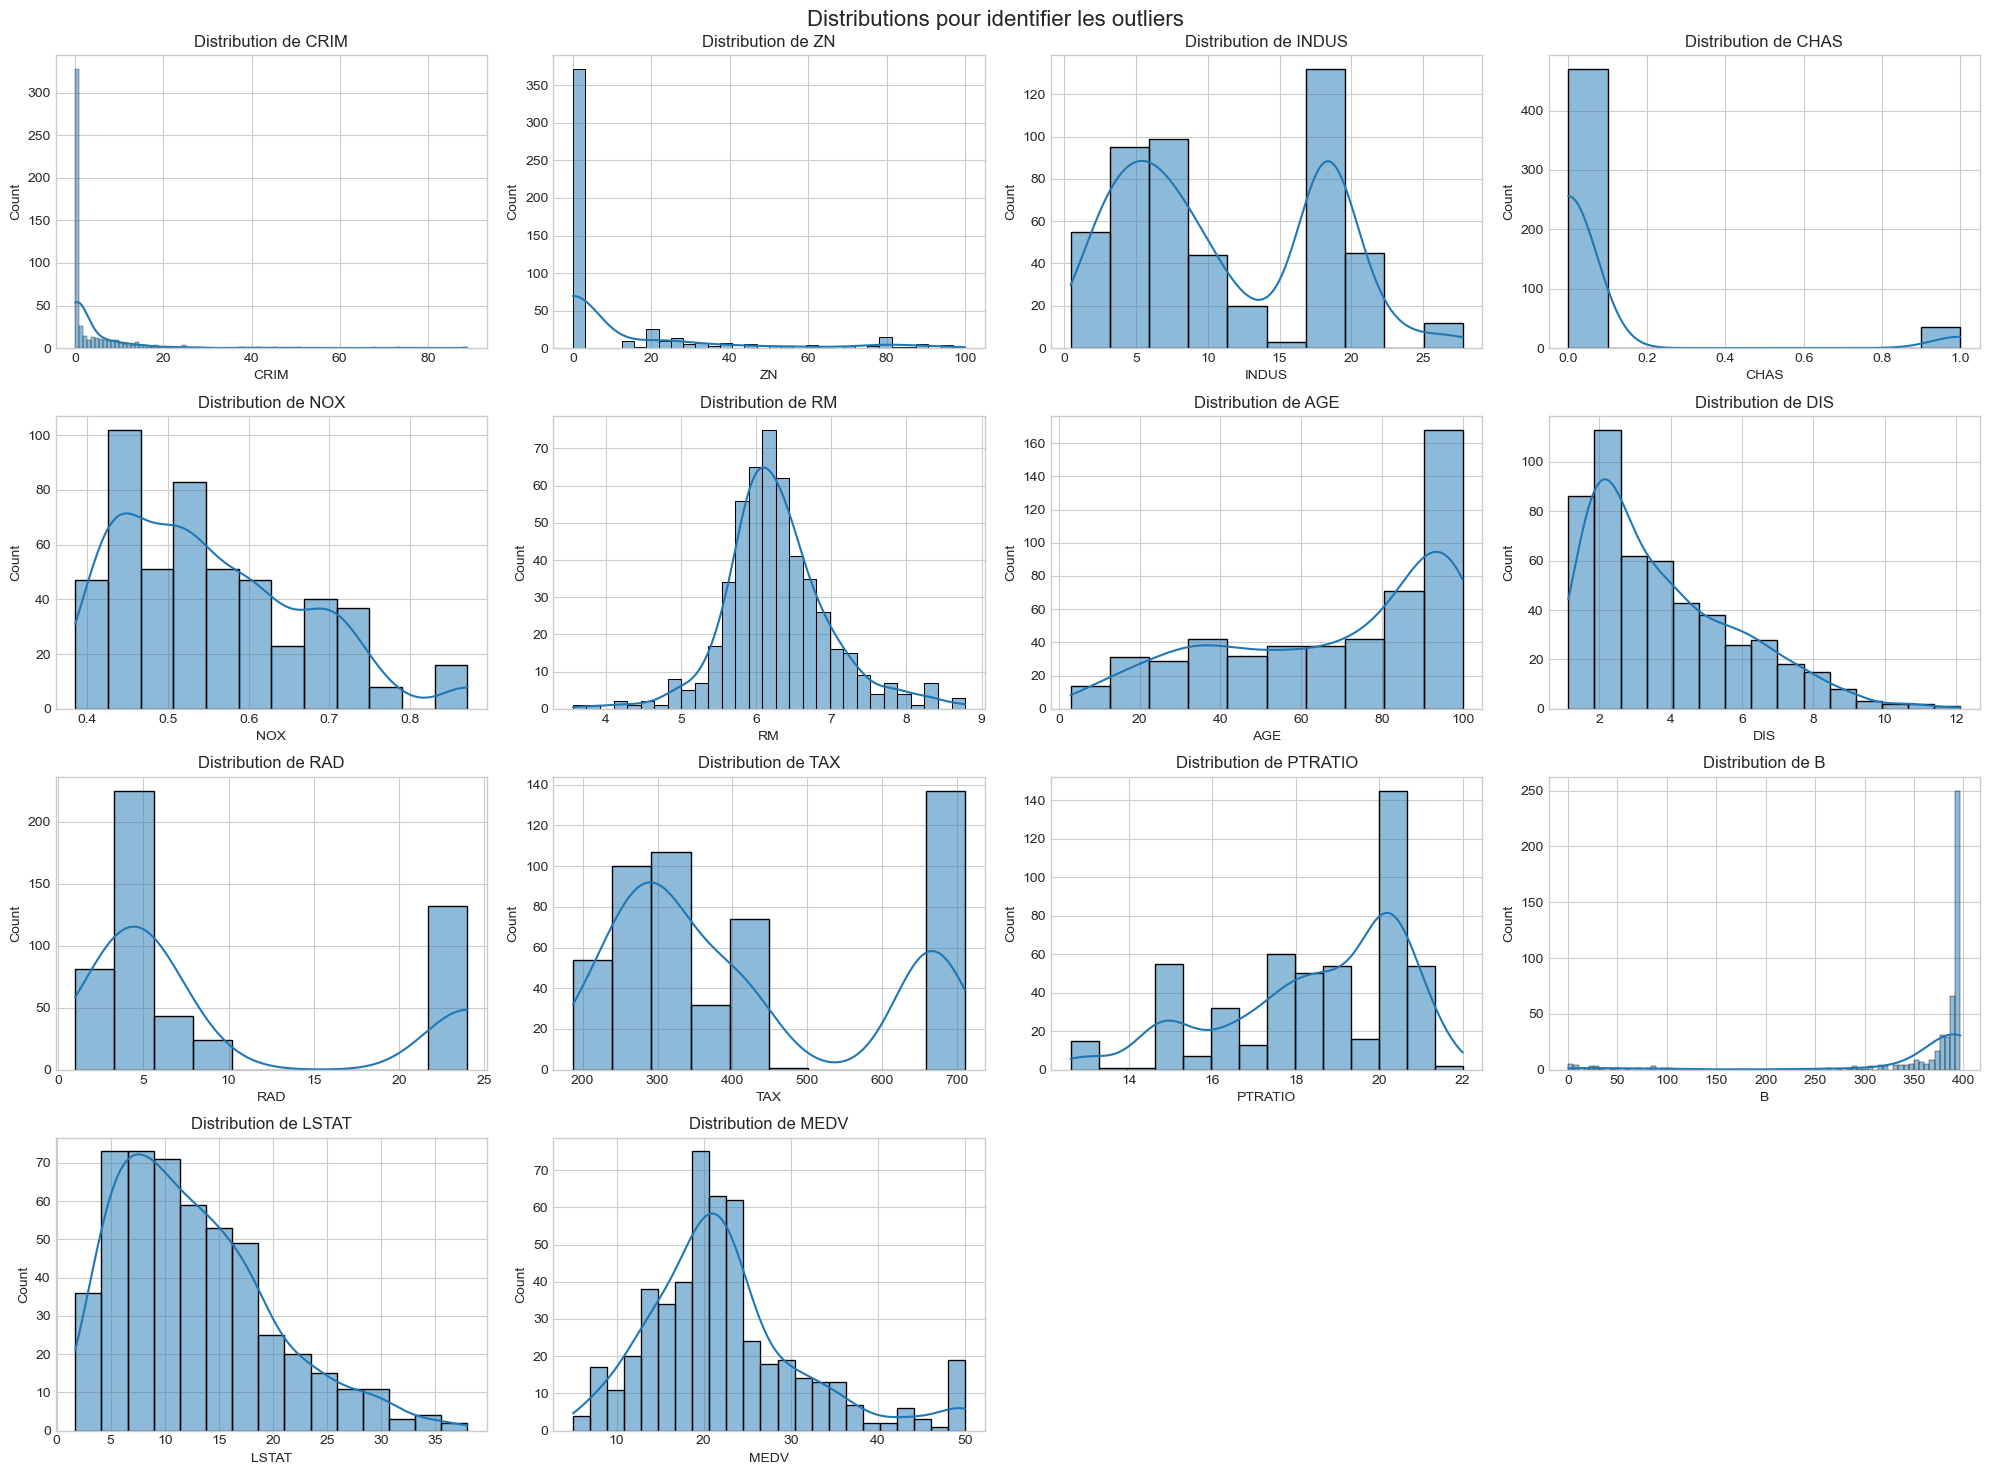

In [78]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (20, 15)

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df_new.columns):
    if i < len(axes):
        sns.histplot(df_new[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution de {col}')
        axes[i].set_xlabel(col)

for i in range(len(df_new.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Distributions pour identifier les outliers', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

### 3. Matrice de corrélation avec heatmap

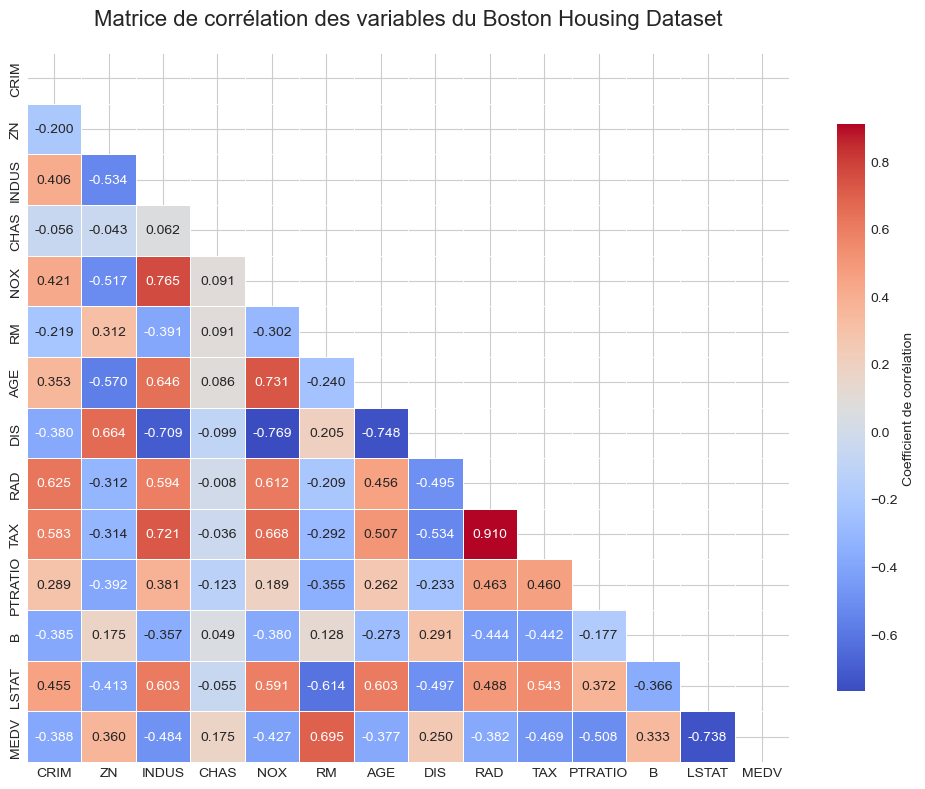


Corrélations fortes (|r| > 0.7):
NOX et INDUS: 0.765
AGE et NOX: 0.731
DIS et INDUS: -0.709
DIS et NOX: -0.769
DIS et AGE: -0.748
TAX et INDUS: 0.721
TAX et RAD: 0.910
MEDV et LSTAT: -0.738


In [79]:
correlation_matrix = df_new.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True,           
            fmt='.3f',            
            cmap='coolwarm',      
            mask=mask,            
            linewidths=0.5,      
            cbar_kws={'shrink': 0.8, 'label': 'Coefficient de corrélation'})

plt.title('Matrice de corrélation des variables du Boston Housing Dataset', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Identifier les corrélations fortes (|r| > 0.7)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

# Afficher les corrélations fortes
if strong_correlations:
    print("\nCorrélations fortes (|r| > 0.7):")
    for var1, var2, corr in strong_correlations:
        print(f"{var1} et {var2}: {corr:.3f}")
else:
    print("\nAucune corrélation forte (|r| > 0.7) n'a été trouvée.")

# Afficher également les corrélations modérées (0.5 < |r| ≤ 0.7)
moderate_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 < abs(corr_value) <= 0.7:
            moderate_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_value
            ))

### 4. Calcul statistique des outliers avec la méthode IQR

In [80]:
def identify_outliers(df):
    outliers_dict = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        if not outliers.empty:
            outliers_dict[col] = {
                'count': len(outliers),
                'percentage': (len(outliers) / len(df)) * 100,
                'min': outliers.min() if not outliers.empty else None,
                'max': outliers.max() if not outliers.empty else None
            }
    return outliers_dict

outliers_summary = identify_outliers(df_new)

print("Résumé des outliers par variable:")
for col, stats in outliers_summary.items():
    print(f"{col}: {stats['count']} outliers ({stats['percentage']:.2f}% des données)")
    print(f"   - Valeurs entre {stats['min']} et {stats['max']}")

Résumé des outliers par variable:
CRIM: 66 outliers (13.07% des données)
   - Valeurs entre 9.18702 et 88.9762
ZN: 68 outliers (13.47% des données)
   - Valeurs entre 33.0 et 100.0
CHAS: 35 outliers (6.93% des données)
   - Valeurs entre 1 et 1
RM: 30 outliers (5.94% des données)
   - Valeurs entre 3.561 et 8.78
DIS: 5 outliers (0.99% des données)
   - Valeurs entre 10.5857 et 12.1265
PTRATIO: 15 outliers (2.97% des données)
   - Valeurs entre 12.6 et 13.0
B: 76 outliers (15.05% des données)
   - Valeurs entre 0.32 et 343.28
LSTAT: 7 outliers (1.39% des données)
   - Valeurs entre 31.99 et 37.97
MEDV: 37 outliers (7.33% des données)
   - Valeurs entre 37.2 et 50.0


### 5. Visualisation des outliers avec des scatter plots pour certaines paires de variables

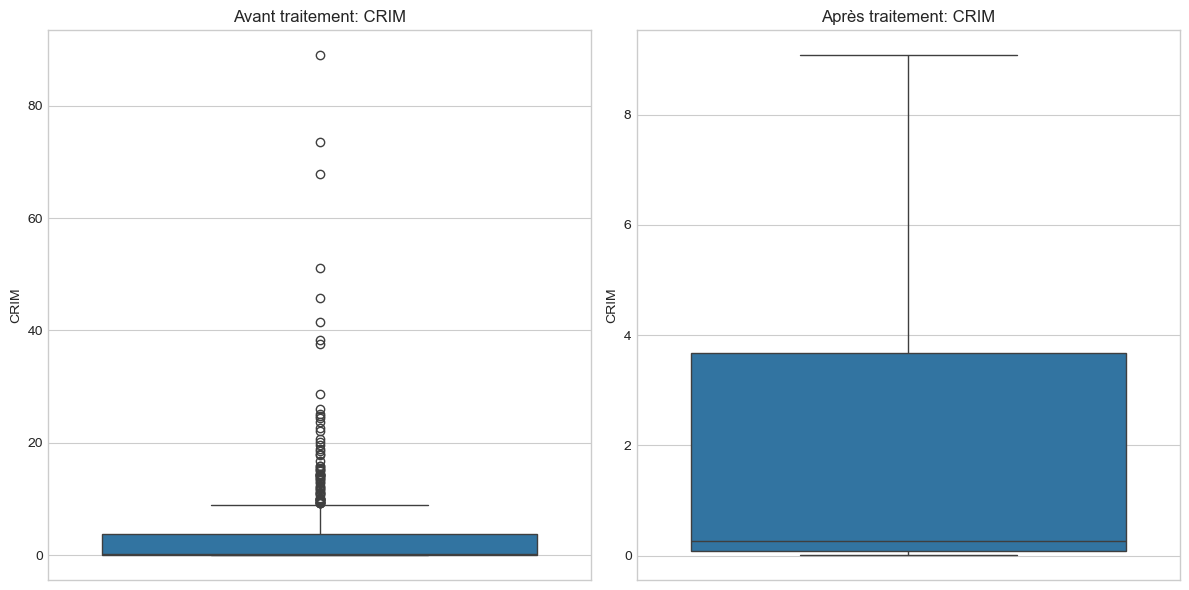

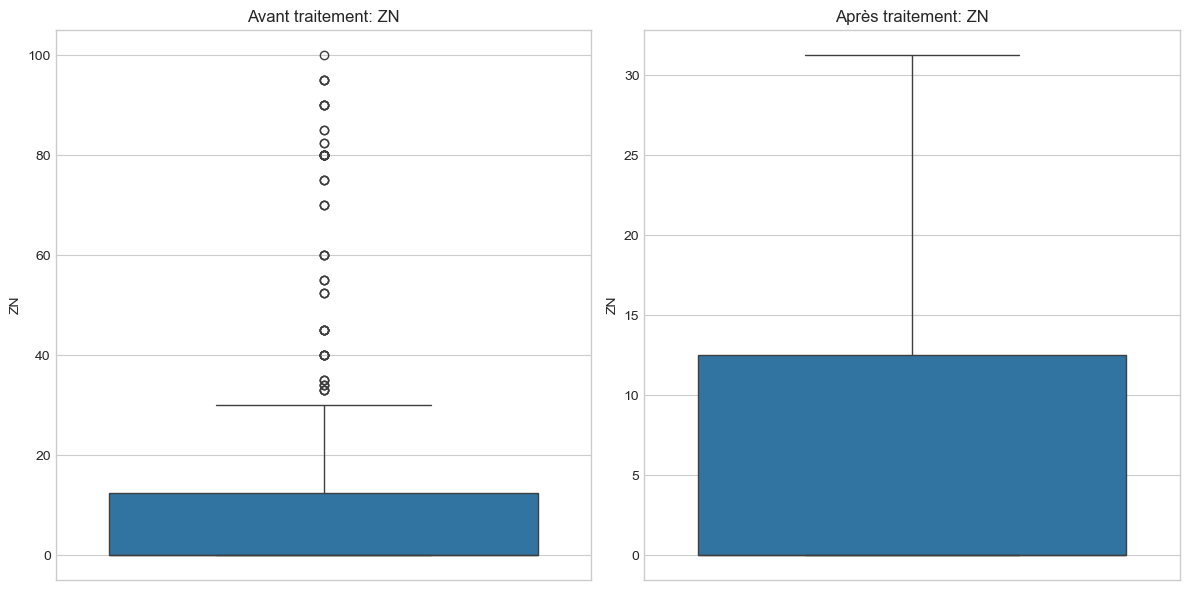

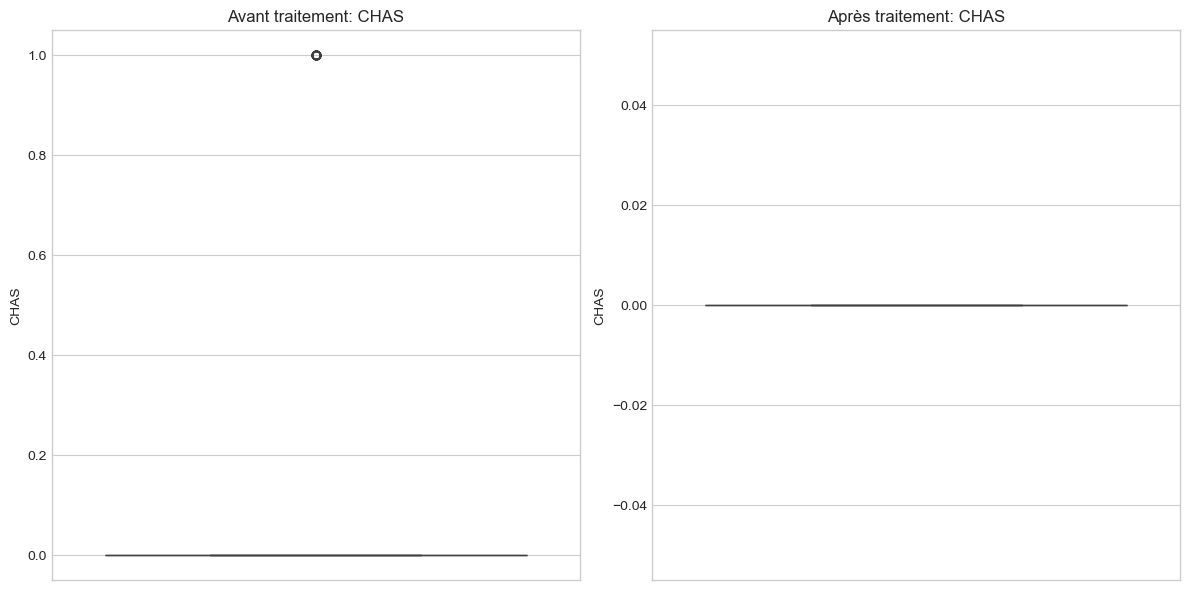

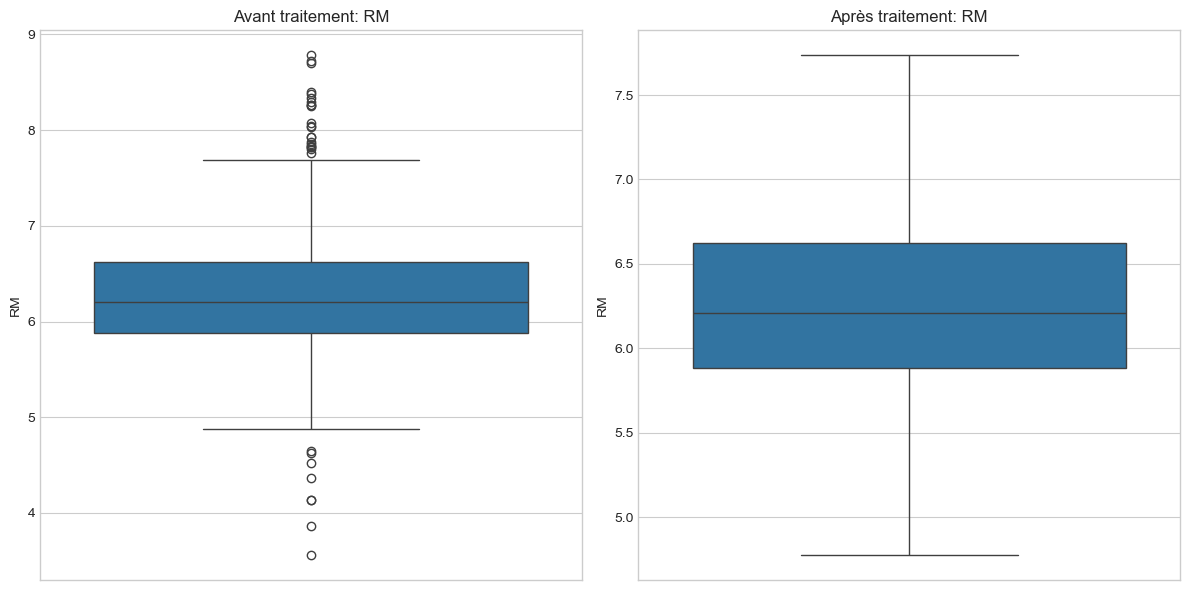

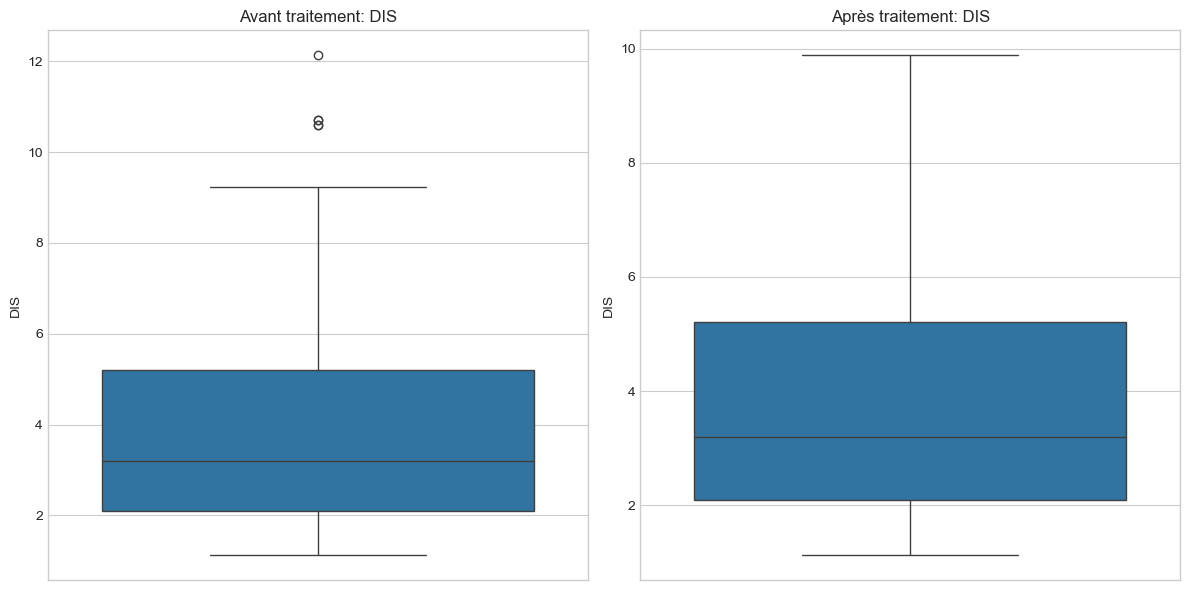

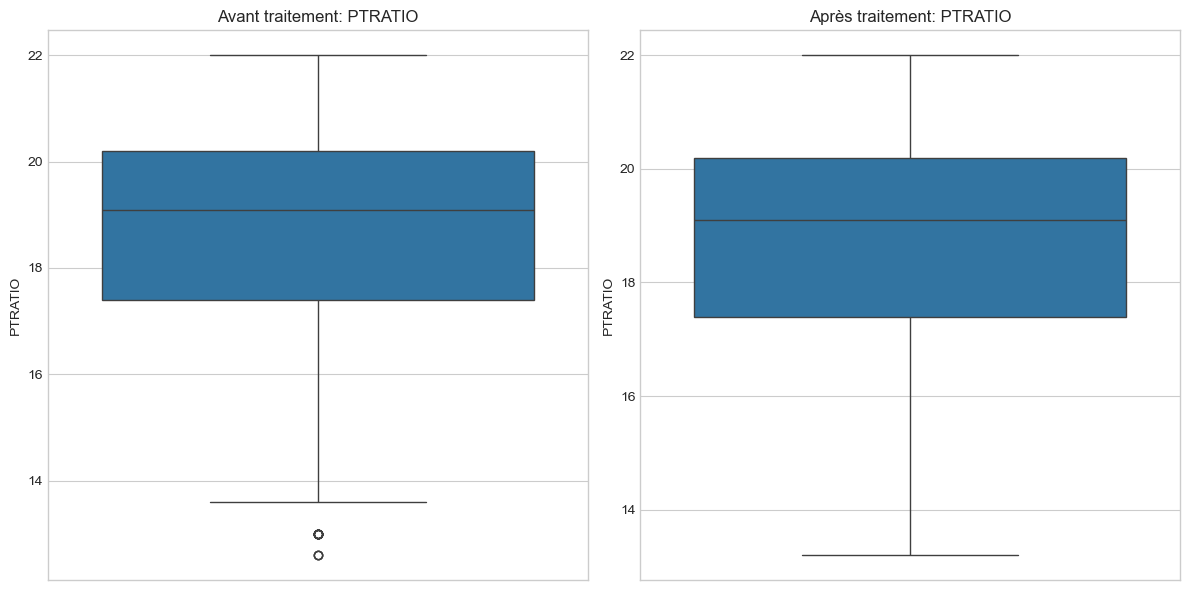

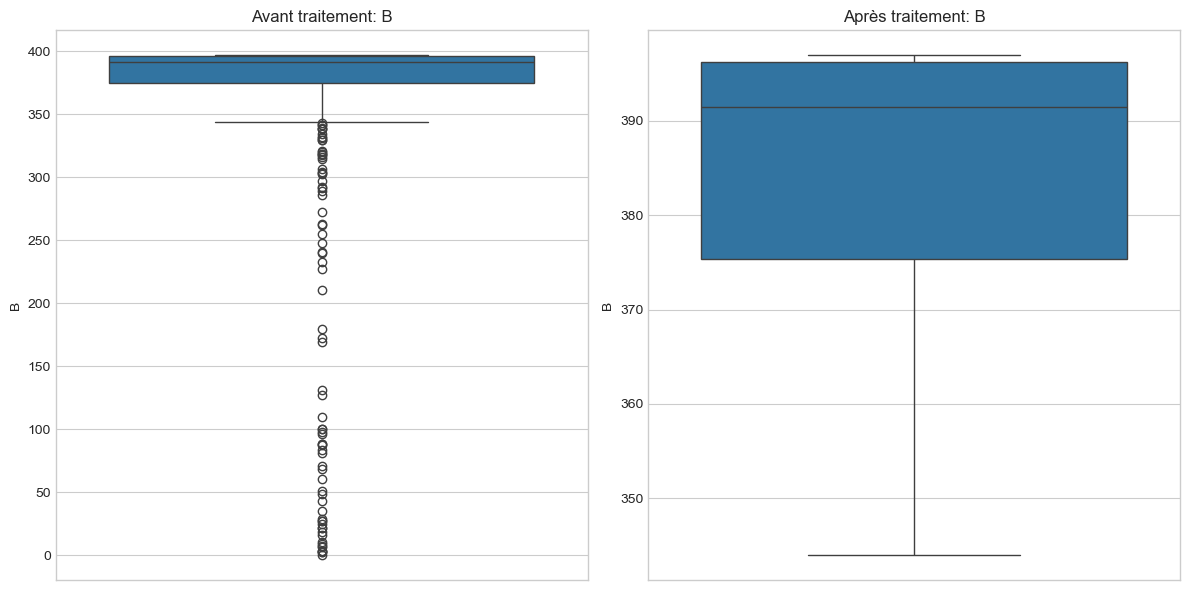

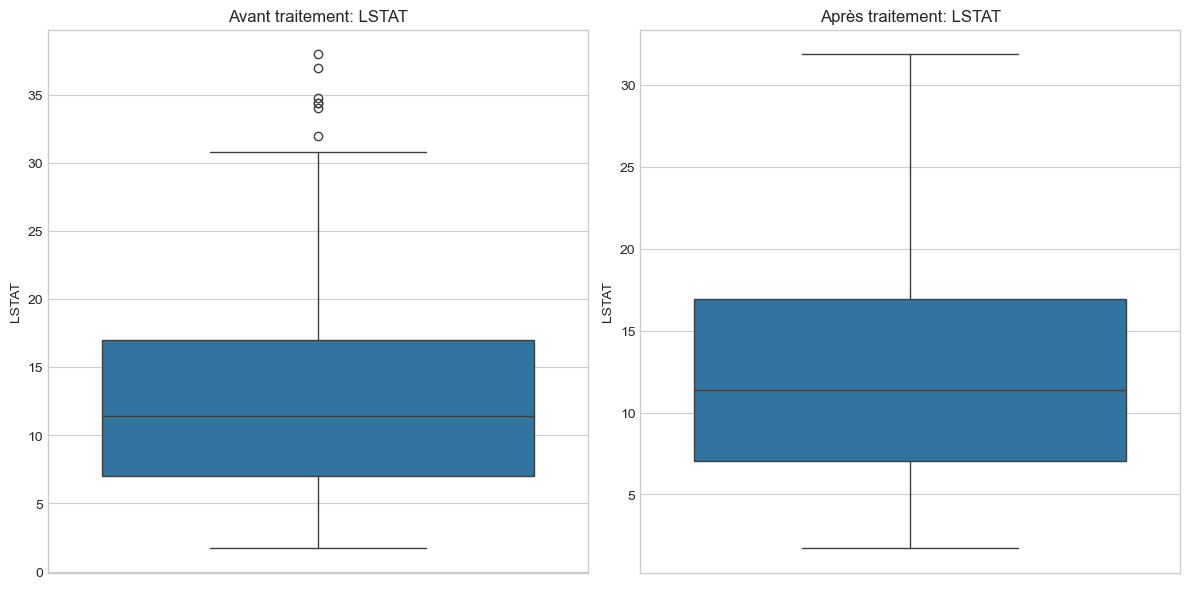

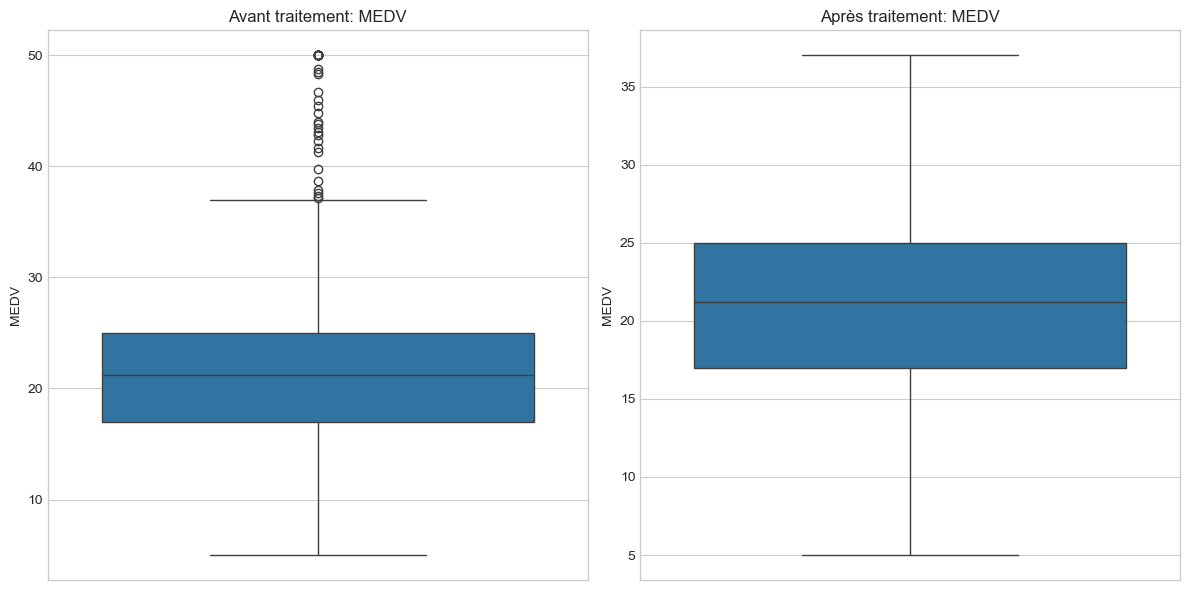

In [81]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers, lower_bound, upper_bound

df_cleaned = df_new.copy()

outliers_summary = {}

for column in df_cleaned.columns:
    outlier_indices, lower, upper = identify_outliers(df_cleaned, column)
    
    if len(outlier_indices) > 0:
        outliers_summary[column] = {
            'count': len(outlier_indices),
            'percentage': (len(outlier_indices) / len(df_cleaned)) * 100,
            'lower_bound': lower,
            'upper_bound': upper
        }
        
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df_cleaned[column])
        plt.title(f'Avant traitement: {column}')
        
        df_cleaned.loc[df_cleaned[column] < lower, column] = lower
        df_cleaned.loc[df_cleaned[column] > upper, column] = upper
        
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_cleaned[column])
        plt.title(f'Après traitement: {column}')
        plt.tight_layout()
        plt.show()

In [82]:
print("Résumé des outliers traités:")
for col, stats in outliers_summary.items():
    print(f"{col}: {stats['count']} outliers ({stats['percentage']:.2f}% des données)")
    print(f"   - Limites appliquées: [{stats['lower_bound']:.3f}, {stats['upper_bound']:.3f}]")

print("\nStatistiques descriptives avant traitement:")
df_new.describe().round(3)

Résumé des outliers traités:
CRIM: 66 outliers (13.07% des données)
   - Limites appliquées: [-5.312, 9.072]
ZN: 68 outliers (13.47% des données)
   - Limites appliquées: [-18.750, 31.250]
CHAS: 35 outliers (6.93% des données)
   - Limites appliquées: [0.000, 0.000]
RM: 30 outliers (5.94% des données)
   - Limites appliquées: [4.775, 7.735]
DIS: 5 outliers (0.99% des données)
   - Limites appliquées: [-2.568, 9.880]
PTRATIO: 15 outliers (2.97% des données)
   - Limites appliquées: [13.200, 24.400]
B: 76 outliers (15.05% des données)
   - Limites appliquées: [344.010, 427.530]
LSTAT: 7 outliers (1.39% des données)
   - Limites appliquées: [-7.915, 31.885]
MEDV: 37 outliers (7.33% des données)
   - Limites appliquées: [5.000, 37.000]

Statistiques descriptives avant traitement:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000
mean,3.621,11.350,11.154,0.069,0.555,6.284,68.582,3.794,9.566,408.459,18.462,356.594,12.668,22.530
std,8.609,23.344,6.856,0.254,0.116,0.703,28.176,2.108,8.708,168.630,2.163,91.368,7.140,9.206
min,0.009,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.000,2.100,4.000,279.000,17.400,375.330,7.010,17.000
50%,0.259,0.000,9.690,0.000,0.538,6.208,77.700,3.199,5.000,330.000,19.100,391.430,11.380,21.200
75%,3.678,12.500,18.100,0.000,0.624,6.625,94.100,5.212,24.000,666.000,20.200,396.210,16.960,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


In [83]:

print("\nStatistiques descriptives après traitement:")
df_cleaned.describe().round(3)


Statistiques descriptives après traitement:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000,505.000,505.000,505.0,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000,505.000
mean,2.230,6.942,11.154,0.0,0.555,6.275,68.582,3.784,9.566,408.459,18.470,381.875,12.626,21.875
std,3.316,12.031,6.856,0.0,0.116,0.631,28.176,2.073,8.708,168.630,2.141,19.091,7.013,7.616
min,0.009,0.000,0.460,0.0,0.385,4.775,2.900,1.130,1.000,187.000,13.200,344.010,1.730,5.000
25%,0.082,0.000,5.190,0.0,0.449,5.885,45.000,2.100,4.000,279.000,17.400,375.330,7.010,17.000
50%,0.259,0.000,9.690,0.0,0.538,6.208,77.700,3.199,5.000,330.000,19.100,391.430,11.380,21.200
75%,3.678,12.500,18.100,0.0,0.624,6.625,94.100,5.212,24.000,666.000,20.200,396.210,16.960,25.000
max,9.072,31.250,27.740,0.0,0.871,7.735,100.000,9.880,24.000,711.000,22.000,396.900,31.885,37.000


In [84]:
remaining_outliers = {}
for column in df_cleaned.columns:
    outlier_indices, _, _ = identify_outliers(df_cleaned, column)
    if len(outlier_indices) > 0:
        remaining_outliers[column] = len(outlier_indices)

if remaining_outliers:
    print("\nOutliers restants après traitement (ce qui est normal car nous avons utilisé la méthode de winsorisation):")
    for col, count in remaining_outliers.items():
        print(f"{col}: {count} outliers")
else:
    print("\nTous les outliers ont été traités.")


Tous les outliers ont été traités.


In [85]:
df_cleaned = df_cleaned.drop(['ZN', 'CHAS'], axis=1)

df_cleaned.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,2.18,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


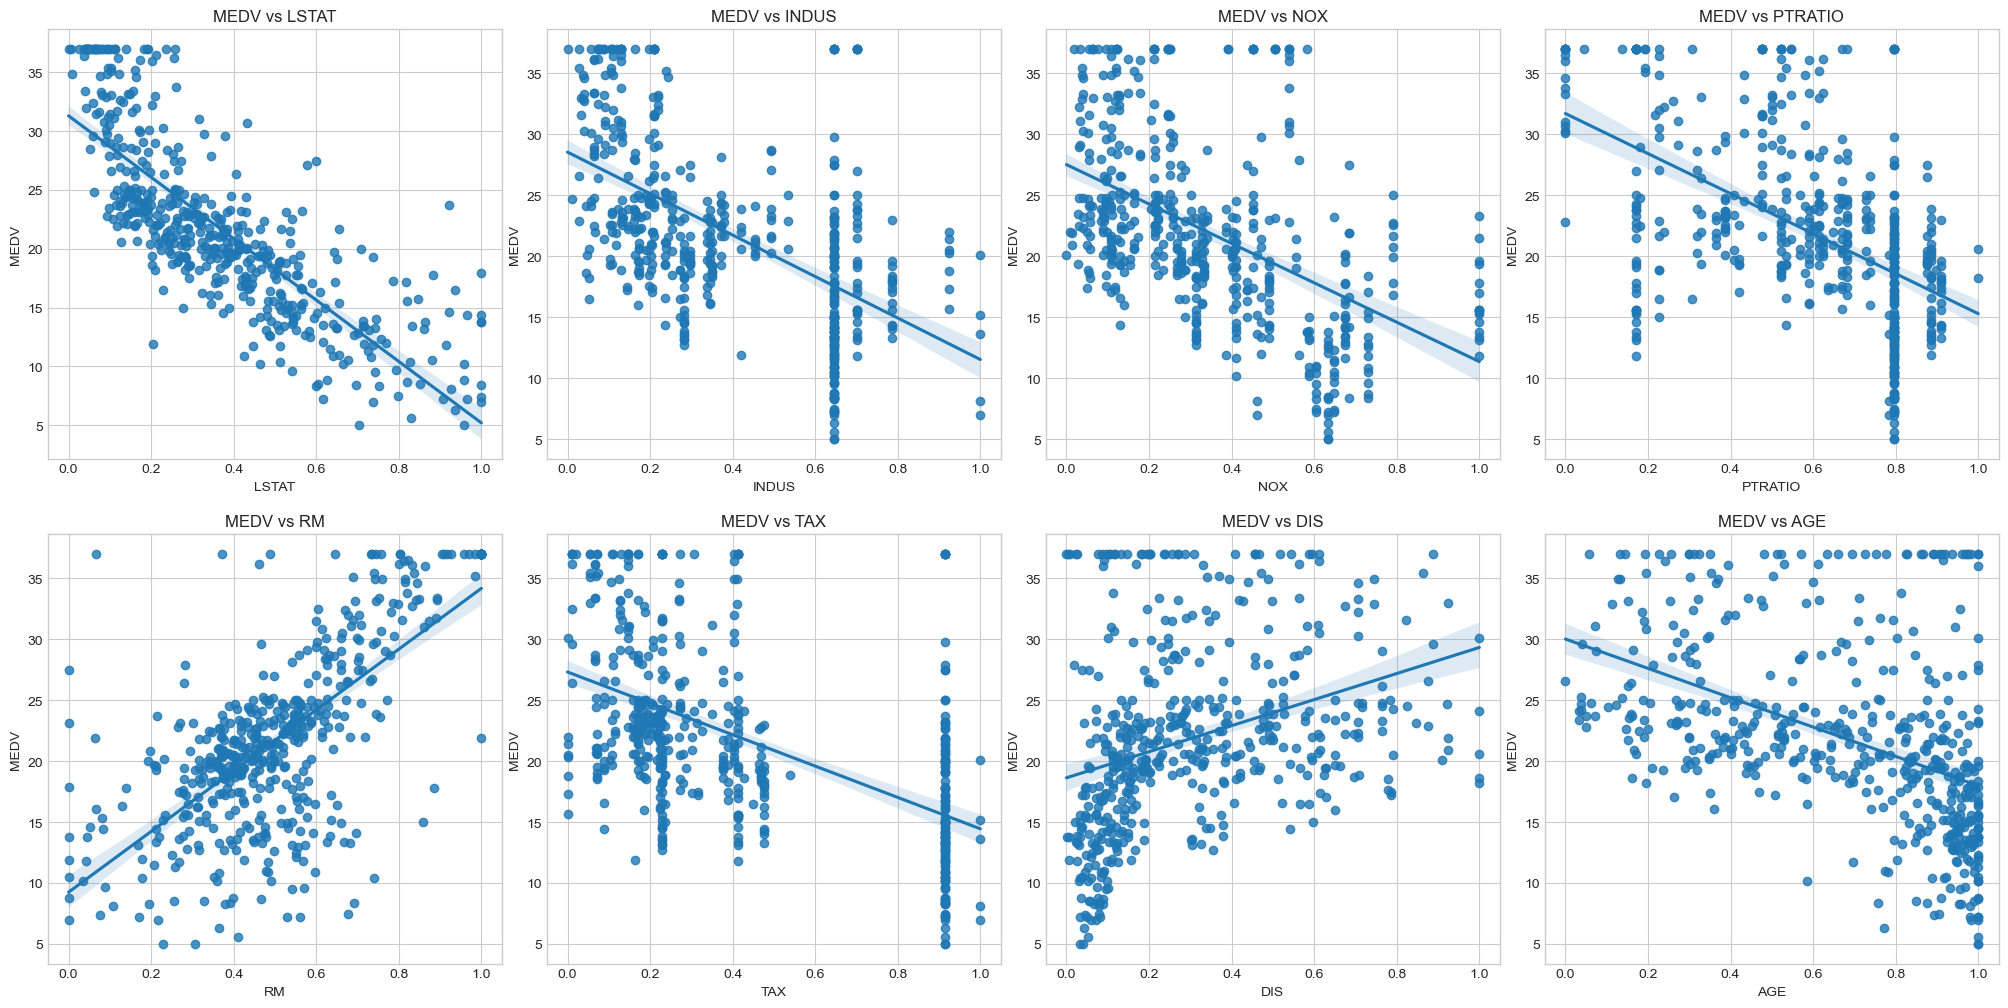

In [86]:
from sklearn import preprocessing

data = df_cleaned

column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

X = data.loc[:, column_sels]
y = data['MEDV']

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(
    data=min_max_scaler.fit_transform(X),
    columns=column_sels
)

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()  # Transformation de la matrice 2D en tableau 1D

for i, feature in enumerate(column_sels):
    sns.regplot(x=X_scaled[feature], y=y, ax=axs[i])
    axs[i].set_title(f'MEDV vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('MEDV')

# Ajustement de la mise en page
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.5)
plt.show()

In [87]:
# df_new.to_csv("df_cleaned.csv", index=False)

In [88]:
X = df_cleaned.drop(columns=["MEDV"])
y = df_cleaned["MEDV"]

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def machine_learning_regression(model, X_train, X_test, y_train, y_test, show_plot=True):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"📈 Modèle : {model.__class__.__name__}")
    print(f"R²        : {r2:.4f}")
    print(f"RMSE      : {rmse:.4f}")
    print(f"MAE       : {mae:.4f}")

    if show_plot:
        plt.figure(figsize=(6, 6))
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Valeurs réelles")
        plt.ylabel("Prédictions")
        plt.title(f"{model.__class__.__name__} : Réel vs Prédit")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


📈 Modèle : LinearRegression
R²        : 0.7192
RMSE      : 3.4947
MAE       : 2.6911


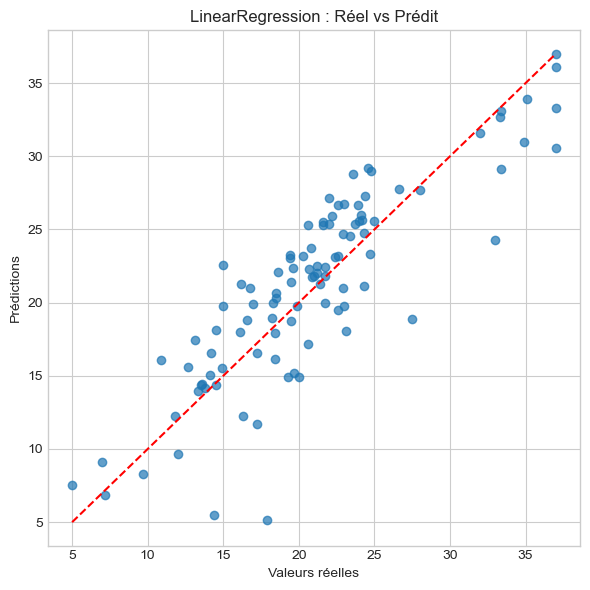

📈 Modèle : RandomForestRegressor
R²        : 0.8440
RMSE      : 2.6052
MAE       : 1.8999


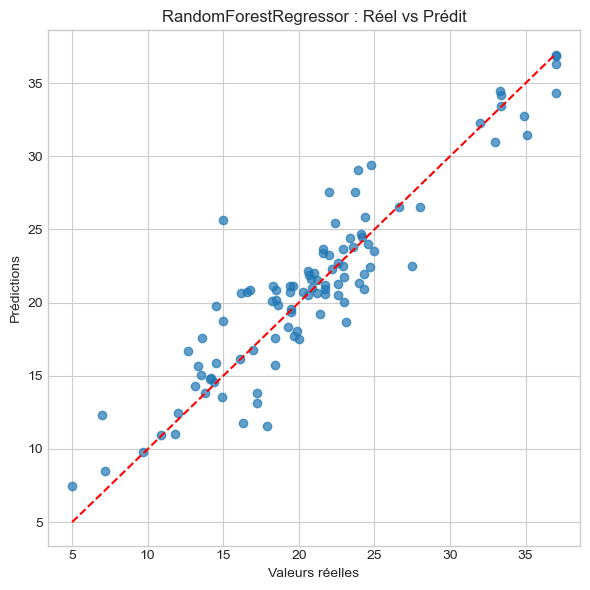

📈 Modèle : GradientBoostingRegressor
R²        : 0.8432
RMSE      : 2.6117
MAE       : 1.8966


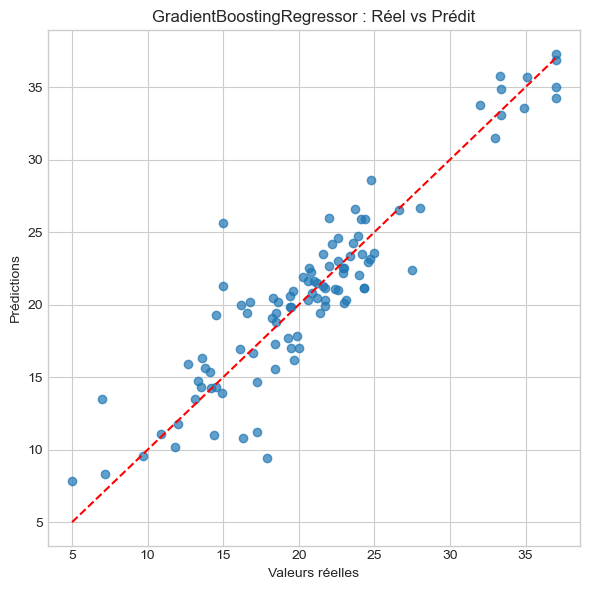

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

machine_learning_regression(LinearRegression(), X_train, X_test, y_train, y_test)
machine_learning_regression(RandomForestRegressor(n_estimators=100, random_state=42, ), X_train, X_test, y_train, y_test)
machine_learning_regression(GradientBoostingRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

# Comparaison des modèles de prédiction des prix immobiliers

En regardant les résultats des trois modèles, voici une interprétation simple :

## En un coup d'œil

| Modèle | Performance | Précision | Commentaire |
|--------|-------------|-----------|-------------|
| **Régression linéaire** | Correcte | Moyenne | Le plus simple mais le moins précis |
| **Random Forest** | Excellente | Élevée | Le meilleur des trois |
| **Gradient Boosting** | Excellente | Élevée | Presque identique au Random Forest |

## Ce que ça signifie concrètement

**Régression linéaire** :
- Explique environ 72% des variations de prix
- Se trompe en moyenne de 3 500 $ par prédiction
- Modèle simple mais moins précis que les autres

**Random Forest** :
- Explique environ 84% des variations de prix
- Se trompe en moyenne de 2 600 $ par prédiction
- Offre la meilleure performance globale, mais de justesse

**Gradient Boosting** :
- Pratiquement identique au Random Forest
- Très légèrement moins précis (différence négligeable)
- Excellente capacité à prédire les prix

## Conclusion simple

Les deux modèles avancés (Random Forest et Gradient Boosting) sont nettement meilleurs que la régression linéaire. Ils réduisent l'erreur moyenne de prédiction d'environ 900 $ et expliquent 12% de plus des variations de prix.

Entre Random Forest et Gradient Boosting, c'est quasiment match nul, avec un très léger avantage pour Random Forest.